In [11]:
pip install statsmodels matplotlib seaborn

  Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 10.8 MB/s eta 0:00:00a 0:00:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 11.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 10.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)


df.head()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
print(df.info())
print("\nSummary statistics:\n", df.describe())

print("\nMissing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB
None

Summary statistics:
              mpg        cyl        disp          hp       drat         wt  \
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500  230.721875  146.687500   3.596563   3.217250   
std     6.026948   1.785922  123.938694   68.562868   0.534679   0.978457   
min    10.400000   

## Pairplot and Heatmap

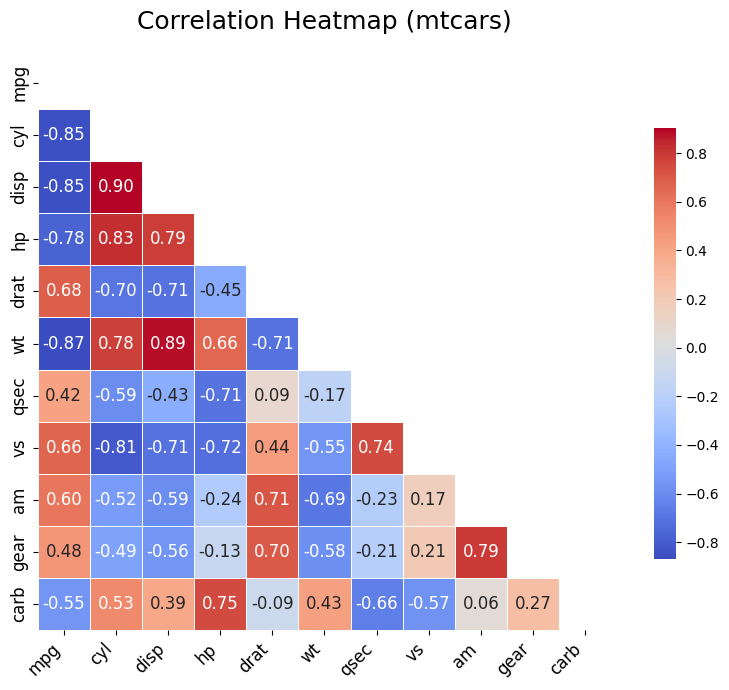

In [ ]:
plt.figure(figsize=(9, 7))
mask = np.triu(np.ones_like(df.corr(), dtype=bool)) 
sns.heatmap(
    df.corr(), 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    square=True, 
    linewidths=0.5, 
    linecolor='white', 
    cbar_kws={"shrink": .75}, 
    mask=mask, 
    annot_kws={"size": 12}
)
plt.title("Correlation Heatmap (mtcars)", fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


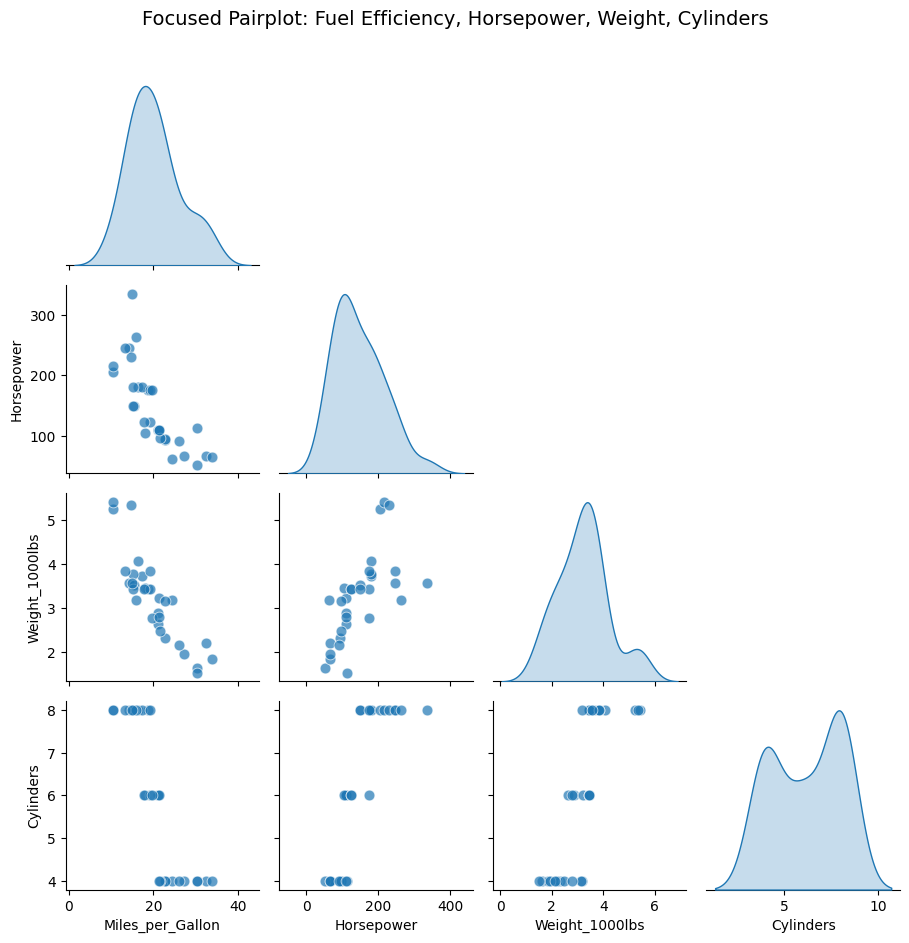

In [22]:
df_renamed = df.rename(columns={
    'mpg': 'Miles_per_Gallon',
    'hp': 'Horsepower',
    'wt': 'Weight_1000lbs',
    'cyl': 'Cylinders'
})

cols = ['Miles_per_Gallon', 'Horsepower', 'Weight_1000lbs', 'Cylinders']

sns.pairplot(
    df_renamed[cols],
    diag_kind="kde",
    corner=True,          
    plot_kws={'alpha': 0.7, 's': 60}, 
    height=2.3
)
plt.suptitle("Focused Pairplot: Fuel Efficiency, Horsepower, Weight, Cylinders", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

# Analyis

## Heatmap and Pairplot

The heatmap highlights several strong correlations among the variables, both positive and negative. Notably, there is a strong negative correlation between weight (wt) and miles per gallon (mpg), with a coefficient of -0.87. This is intuitive, as heavier cars generally consume more fuel and therefore have lower fuel efficiency. Conversely, lighter cars tend to achieve higher mpg values.

A strong positive correlation is also evident between engine displacement (disp) and the number of cylinders (cyl). This makes sense because engine displacement represents the total volume of all cylinders in an engine, so vehicles with more cylinders typically have larger displacements.

The pairplot visually confirms these relationships observed in the heatmap. It clearly shows that as weight or the number of cylinders increases, mpg decreases. This provides additional support for the patterns identified in the correlation matrix.


## Distribution 

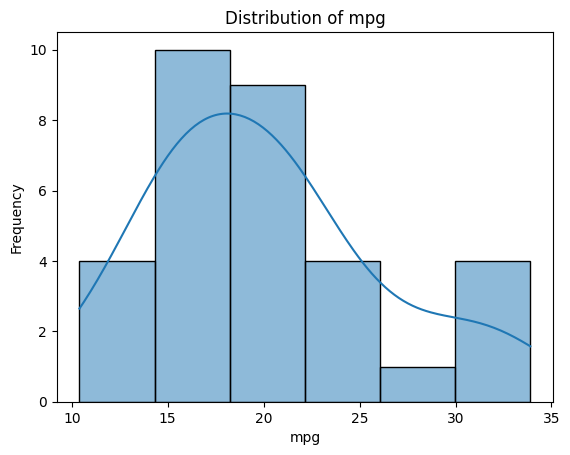

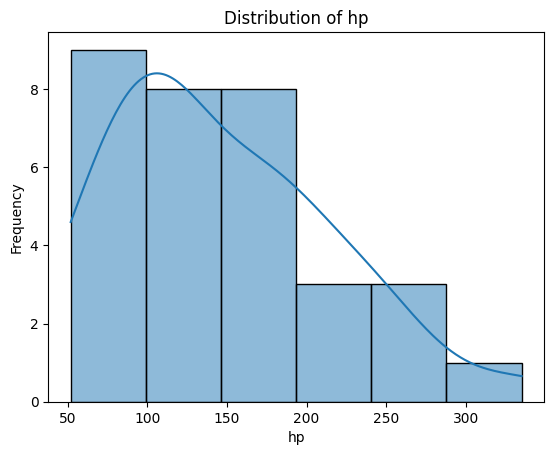

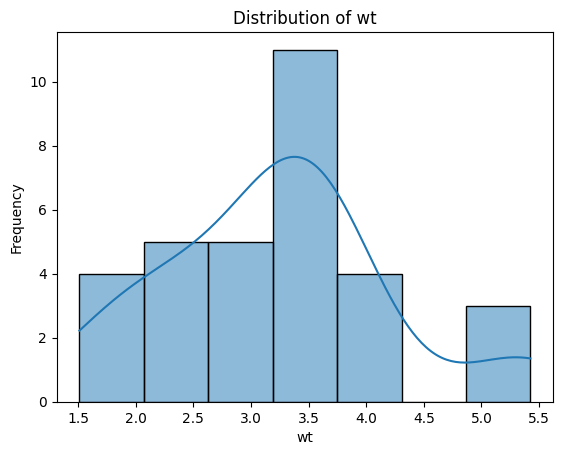

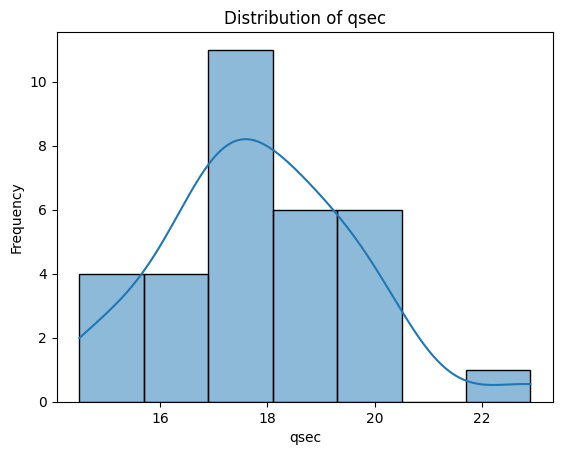

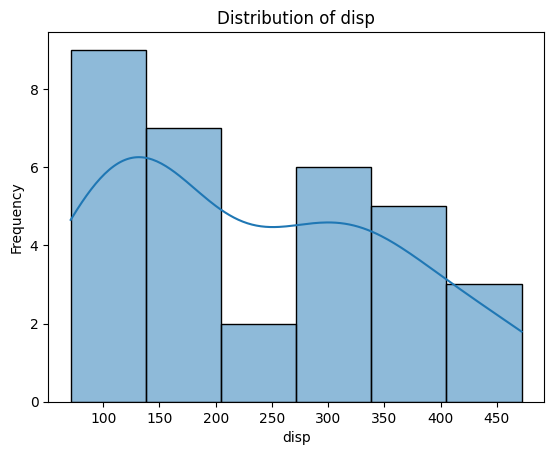

In [16]:
features = ['mpg', 'hp', 'wt', 'qsec', 'disp']

for col in features:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


## Scatterplot for MPG vs Horsepower and Weight vs MPG

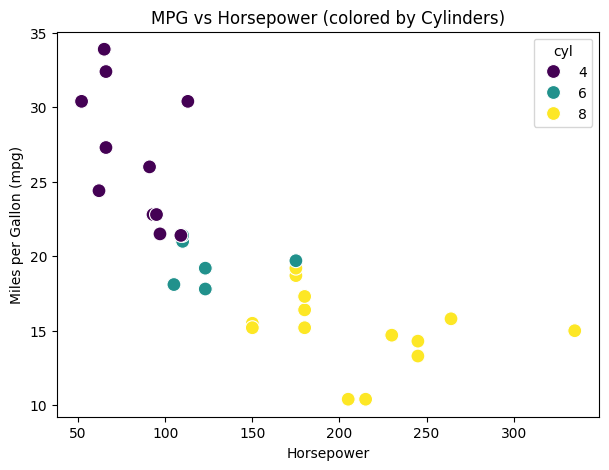

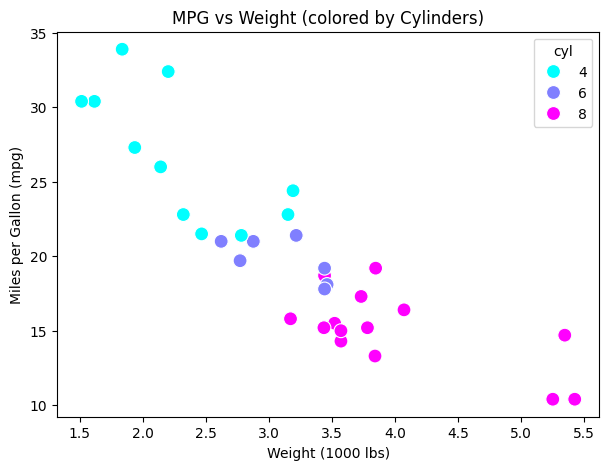

In [18]:
# Horsepower vs MPG
plt.figure(figsize=(7, 5))
sns.scatterplot(x='hp', y='mpg', data=df, hue='cyl', palette='viridis', s=100)
plt.title("MPG vs Horsepower (colored by Cylinders)")
plt.xlabel("Horsepower")
plt.ylabel("Miles per Gallon (mpg)")
plt.show()

# Weight vs MPG
plt.figure(figsize=(7, 5))
sns.scatterplot(x='wt', y='mpg', data=df, hue='cyl', palette='cool', s=100)
plt.title("MPG vs Weight (colored by Cylinders)")
plt.xlabel("Weight (1000 lbs)")
plt.ylabel("Miles per Gallon (mpg)")
plt.show()


# Analysis

## MPG vs Horsepower
There is a clear negative correlation between horsepower and miles per gallon (MPG). Vehicles with higher horsepower tend to have lower MPG, indicating reduced fuel efficiency. Additionally, cars with higher horsepower also generally have more cylinders. This is expected, as engines with more cylinders typically produce greater power output, but at the cost of increased fuel consumption.

## MPG vs Weight
A similar negative relationship is observed between vehicle weight and MPG: heavier cars tend to have lower fuel efficiency. The scatterplot further suggests that heavier vehicles often have more cylinders. This association makes sense, as larger and heavier cars require more powerful (and therefore larger, multi-cylinder) engines to achieve adequate performance. The increased engine size and weight contribute to higher fuel consumption, which lowers MPG.